In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

In [5]:
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

In [6]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [7]:
train.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
115,5.5,2.6,4.4,1.2,1
116,5.7,3.0,4.2,1.2,1
117,4.4,2.9,1.4,0.2,0
118,4.8,3.0,1.4,0.1,0
119,5.5,2.4,3.7,1.0,1


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  120 non-null    float64
 1   SepalWidth   120 non-null    float64
 2   PetalLength  120 non-null    float64
 3   PetalWidth   120 non-null    float64
 4   Species      120 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.8 KB


In [9]:
train.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,5.845000,3.065000,3.739167,1.196667,1.000000
std,0.868578,0.427156,1.822100,0.782039,0.840168
min,4.400000,2.000000,1.000000,0.100000,0.000000
25%,5.075000,2.800000,1.500000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.425000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Text(0, 0.5, 'Count')

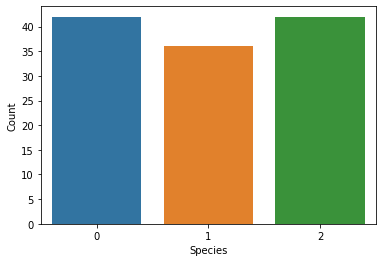

In [10]:
dfcnt = train.groupby("Species").count().reset_index()
sns.barplot(x="Species", y="SepalLength", data=dfcnt)
plt.ylabel("Count")

In [11]:
dfsl = train.groupby("Species")["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"].mean().reset_index()

<ipython-input-11-ca8a44124423>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfsl = train.groupby("Species")["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"].mean().reset_index()


In [12]:
def flower_attr(attribute):
    print("0 -> Setosa")
    print("1 -> Versicolor")
    print("2 -> Virginica")
    return sns.pointplot(x="Species", y=attribute, data=dfsl)

0 -> Setosa
1 -> Versicolor
2 -> Virginica


<AxesSubplot:xlabel='Species', ylabel='SepalLength'>

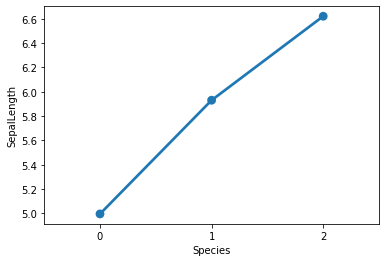

In [13]:
flower_attr("SepalLength")

In [14]:
train_y = train.pop('Species')
test_y = test.pop('Species')

In [15]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [16]:
def input_fn(features, labels, training=True, batch_size=256):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    if training:
        dataset = dataset.shuffle(1000).repeat()
    return dataset.batch(batch_size)

In [17]:
my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [18]:
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    hidden_units=[30, 10],
    n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Owner\\AppData\\Local\\Temp\\tmp2j802r5c', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [24]:
classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=5000)

TypeError: input_fn() got an unexpected keyword argument 'training'

In [20]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(test, test_y, training=False))
print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-08-04T14:15:38
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Owner\AppData\Local\Temp\tmp2j802r5c\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 3.13260s
INFO:tensorflow:Finished evaluation at 2022-08-04-14:15:41
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.56666666, average_loss = 0.7477913, global_step = 5000, loss = 0.7477913
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: C:\Users\Owner\AppData\Local\Temp\tmp2j802r5c\model.ckpt-5000

Test set accuracy: 0.567



In [21]:
def input_fn(features, batch_size=256):
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)
features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

In [22]:
predictions = classifier.predict(input_fn = lambda : input_fn(pd.DataFrame({"SepalLength" : [6], "SepalWidth" : [3], "PetalLength" : [4], "PetalWidth" : [2]})))

In [23]:
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]
    print('Prediction is "{}" ({:.1f}%)'.format(
        SPECIES[class_id], 100 * probability))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Owner\AppData\Local\Temp\tmp2j802r5c\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "Virginica" (57.5%)
